# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from api_keys import weather_api_key
from citipy import citipy


## Generate Cities List

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding latitudes, longitudes and cities
lat_lngs = []
cities = []

# Set of random lat and lng combinations
lats = np.random.uniform(low=-90.0, high=90.0, size=2000)
lngs = np.random.uniform(low=-180.0, high=180.0, size=2000)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat,lng location
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If city is unique, add it to cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


758

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)
# Create lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []
date_list = []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
       
    #Start the error handling
    #Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
        
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp_max = response_json['main']['temp_max']
        temp_list.append(temp_max)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        cloudiness = response_json['clouds']['all']
        clouds_list.append(cloudiness)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
        
        date = response_json["dt"]
        date_list.append(date)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        
        print("cannot be found, moving to next city...")

http://api.openweathermap.org/data/2.5/weather?appid=8b1c1547db242544a8700adc06ef8373&units=imperial&q=
City Name: vaini, City ID: 4032243
cannot be found, moving to next city...
City Name: adiake, City ID: 2293428
City Name: port elizabeth, City ID: 964420
City Name: iqaluit, City ID: 5983720
City Name: bucerias, City ID: 4016734
City Name: punta arenas, City ID: 3874787
City Name: upernavik, City ID: 3418910
City Name: povenets, City ID: 505820
City Name: mataura, City ID: 6201424
City Name: ushuaia, City ID: 3833367
City Name: tigil, City ID: 2120612
City Name: klaksvik, City ID: 2618795
City Name: busselton, City ID: 2075265
City Name: rikitea, City ID: 4030556
City Name: hermanus, City ID: 3366880
City Name: lebu, City ID: 3883457
City Name: chuy, City ID: 3443061
City Name: bluff, City ID: 2206939
City Name: hithadhoo, City ID: 1282256
City Name: cap malheureux, City ID: 934649
City Name: caravelas, City ID: 3466980
City Name: tacoronte, City ID: 2510725
City Name: cape town, Cit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert the data into a dataframe
cities_df = pd.DataFrame({"City": city_name_list, "Lat": lat_list, "Lng": lng_list,
                         "Max Temp": temp_list, "Humidity": humidity_list, "Cloudiness": clouds_list,
                         "Wind Speed": wind_speed_list,"Country": country_list, "Date": date_list})
cities_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,80.76,89,20,4.61,TO,1627101623
1,Adiaké,5.2863,-3.3040,74.79,80,100,6.93,CI,1627101624
2,Port Elizabeth,-33.9180,25.5701,37.69,93,0,0.00,ZA,1627101624
3,Iqaluit,63.7506,-68.5145,47.93,76,75,3.00,CA,1627101624
4,Bucerías,20.7500,-105.3333,77.99,93,74,3.96,MX,1627101342


In [5]:
# Export to .csv file
cities_df.to_csv("output_data/cities.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humidity_df= cities_df.loc[cities_df["Humidity"]>100]
humidity_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [7]:
# Skipped this step since humidity not greater than 100%

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

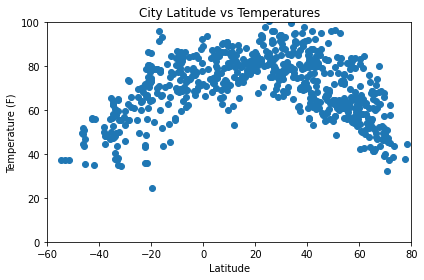

In [10]:
x_values = cities_df["Lat"]
y_values = cities_df["Max Temp"]

plt.scatter(x_values,y_values)
plt.title('City Latitude vs Temperatures')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.tight_layout()
plt.savefig("Images/lat_temp.png")
plt.show()

This plot evaluates the relationship between City Latitude and Temperature showing the increase in Temperature as you aprroach the equator.

## Latitude vs. Humidity Plot

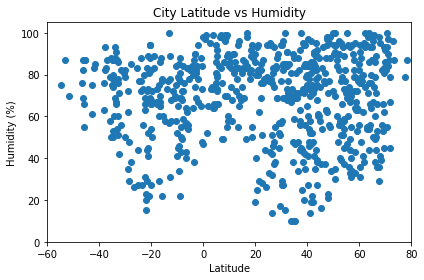

In [11]:
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]

plt.scatter(x_values,y_values)
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.tight_layout()
plt.savefig("Images/lat_humid.png")
plt.show()

This plot evaluates the relationship between City Latitude and Humidity which shows there is not much of a correlation between City Latitude and Humidity .

## Latitude vs. Cloudiness Plot

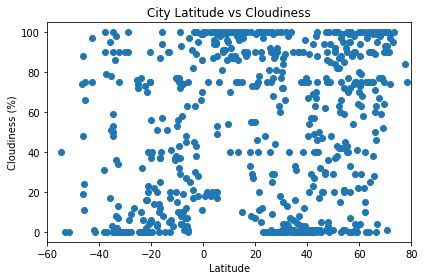

In [12]:
x_values = cities_df["Lat"]
y_values = cities_df["Cloudiness"]

plt.scatter(x_values,y_values)
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.tight_layout()
plt.savefig("Images/lat_clouds.png")
plt.show()

This plot evaluates the relationship between City Latitude and Cloudiness which shows there is not much of a correlation between City Latitude and Cloudiness .

## Latitude vs. Wind Speed Plot

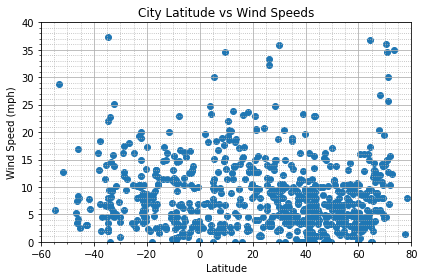

In [13]:
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('City Latitude vs Wind Speeds')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.savefig("Images/lat_wind.png")
plt.show()

This plot evaluates the relationship between City Latitude and Wind Speed which shows the Wind Speed increases as you move further away from the equator(latitude 0).

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression